**La celda de abajo se corre solamente si se utiliza en google colab. Despues de correr la celda se carga nuevamente la página para poder utilizar Julia**

In [ ]:
#=
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'
=#

In [ ]:
1 + 1

In [ ]:
1.0 + 1.0

In [ ]:
methods(+)

In [ ]:
@which 1 + 1

In [ ]:
@macroexpand @which 1 + 1

In [ ]:
import Pkg

In [ ]:
Pkg.add("Plots")

In [ ]:
using Plots

## Definiciones de funciones y structs

#### Circulo

In [ ]:
struct Círculo
end

In [ ]:
function circleShape(h,k,r)
  θ = LinRange(0, 2*π, 500)
  h .+ r*sin.(θ), k .+ r*cos.(θ)
end

In [ ]:
function plotear_circulo()
  #circleShape(h,k,r) donde h,k es el centro del circulo y r es el radio

  plot(circleShape(0,0,1), seriestype = [:shape,], lw = 0.5, c =:blue, linecolor = :black, legends = false, fillalpha = 0.2, aspect_ratio = 1)
end

#### Ondas

In [ ]:
struct Ondas
end

In [ ]:
gr() 
p = plot([sin, cos], zeros(0), leg = false)
anim = Animation()
for x = range(0, stop = 10π, length = 100)
  push!(p, x, Float64[sin(x), cos(x)])
  frame(anim)
end

In [ ]:
function plotear_ondas_animadas()
     gif(anim, "sen_cos_tdl.gif", fps = 15)   
end

#### Circulo animado

In [ ]:
@userplot CirclePlot
    @recipe function f(cp::CirclePlot)
      x, y, i = cp.args
      n = length(x)
      inds = circshift(1:n, 1 - i)
      linewidth --> range(0, 10, length = n)
      seriesalpha --> range(0, 1, length = n)
      aspect_ratio --> 1
      label --> false
      x[inds], y[inds]
  end

In [ ]:
function plotear_circulo_animado()
  n = 150
  t = range(0, 2π, length = n)
  x = sin.(t)
  y = cos.(t)

  anim2 = @animate for i ∈ 1:n
    circleplot(x, y, i)
  end
  gif(anim2, "anim2_fps15.gif", fps = 30)
end

In [ ]:
plotear_circulo_animado()

In [ ]:
function plotear_circulo_animado_colorido()
  @gif for i ∈ 1:n
    circleplot(x, y, i, line_z = 1:n, cbar = false, framestyle = :zerolines)
  end every 5
end

#### Plotear corazon

In [ ]:
struct Corazon
end

In [ ]:
function plotear_corazon()
  nn = 100
  tt = range(0, 2π, length = nn)
  xx = 16sin.(tt).^3
  yy = 13cos.(tt) .- 5cos.(2tt) .- 2cos.(3tt) .- cos.(4tt)
  @gif for i ∈ 1:nn
    circleplot(xx, yy, i, line_z = 1:nn, cbar = false, c = :reds, framestyle = :none)
  end when i > 40 && mod1(i, 10) == 5
end

#### Plotear esfera

In [ ]:
struct Esfera

end

In [ ]:
function plotear_esfera()
  ϕs = range(-π, π, length = 50)
  θs = range(0, π, length = 25)
  θqs = range(1, π - 1, length = 25)
  x_3 = vec([sin(θ) * cos(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
  y_3 = vec([sin(θ) * sin(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
  z_3 = vec([cos(θ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
  u_3 = 0.1 * vec([sin(θ) * cos(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
  v_3 = 0.1 * vec([sin(θ) * sin(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
  w_3 = 0.1 * vec([cos(θ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
  quiver(x_3, y_3, z_3, quiver = (u_3, v_3, w_3))
end

####Plotear lorenz

In [ ]:
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end
 
function plotear_lorenz()

  function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
  end
  
  attractor = Lorenz()

  # initialize a 3D plot with 1 empty series
  plt_lorenz = plot3d(1,xlim = (-30, 30),ylim = (-30, 30),zlim = (0, 60),title = "Lorenz Attractor",marker = 2,)

  # build an animated gif by pushing new points to the plot, saving every 10th frame
  @gif for i=1:1500
    step!(attractor)
    push!(plt_lorenz, attractor.x, attractor.y, attractor.z)
  end every 10
end

## Multiple Dispatch

El acto de llamar a un particular método se llama **Dispatch**, una funcion puede tener varios metodos como pudimos observar en el ejemplo de la función "+". Y el proceso que usa Julia para seleccionar cual método usar se llama **Multiple dispatch**. Lo que hace es fijarse en la cantidad de argumentos y para cada argumento observar su tipo de dato, esto es para todos los argumentos de la función y así elegir que método o versión vamos a llamar. Luego de eso llega a un árbol de sintaxis abstracta que es basicamente una representación en memoria de la función cuando se compiló.

De esta manera se puede observar graficamente

![Ejemplo recorrido](https://i.imgur.com/yRfuX6q.png)


#### Plots

In [ ]:
plotear(lorenz::Lorenz) = return plotear_lorenz()
plotear(esfera::Esfera) = return plotear_esfera()
plotear(corazon::Corazon) = return plotear_corazon()
plotear(circulo::Círculo) = return plotear_circulo()
plotear(x) = return("No hay nada para plotear")

In [116]:
struct Algo
    x::Int64
end

In [117]:
x = Algo

Algo

In [118]:
plotear(x)

"No hay nada para plotear"

##### Circulo 

In [119]:
circulo = Círculo()

Círculo()

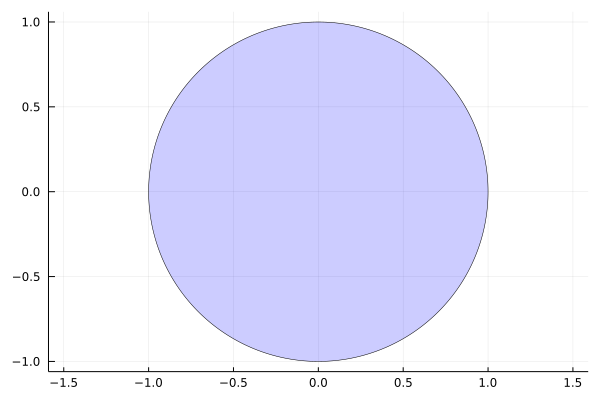

In [120]:
plotear(circulo)

##### Esfera

In [121]:
esfera = Esfera()

Esfera()

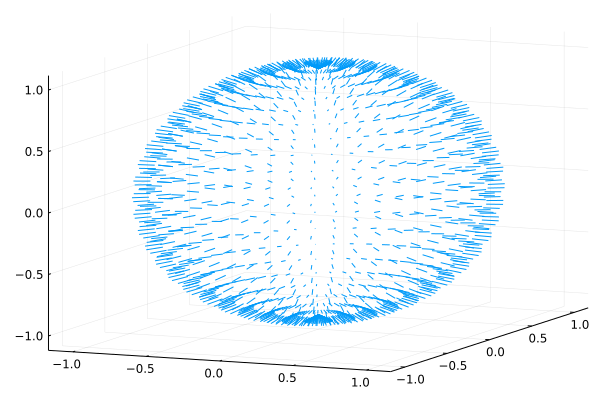

In [122]:
plotear(esfera)

##### Corazón

In [123]:
coraxao = Corazon()

Corazon()

┌ Info: Saved animation to 
│   fn = C:\Users\gabir\tmp.gif
└ @ Plots C:\Users\gabir\.julia\packages\Plots\YVapH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\gabir\\tmp.gif")
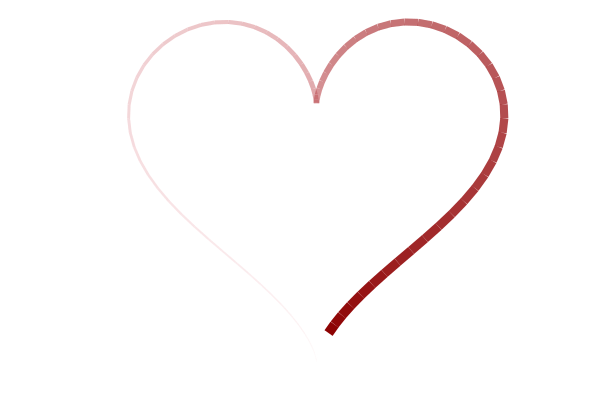

In [124]:
plotear(coraxao)

In [ ]:
function plotear_corazon()
  nn = 100
  tt = range(0, 2π, length = nn)
  xx = 16sin.(tt).^3
  yy = 13cos.(tt) .- 5cos.(2tt) .- 2cos.(3tt) .- cos.(4tt)
  @gif for i ∈ 1:nn
    circleplot(xx, yy, i, line_z = 1:nn, cbar = false, c = :reds, framestyle = :none)
  end when i > 40 && mod1(i, 10) == 5
end

##### Lorenz

In [127]:
lorenzo = Lorenz()

Lorenz(0.02, 10.0, 28.0, 2.6666666666666665, 1.0, 1.0, 1.0)

┌ Info: Saved animation to 
│   fn = C:\Users\gabir\tmp.gif
└ @ Plots C:\Users\gabir\.julia\packages\Plots\YVapH\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\gabir\\tmp.gif")
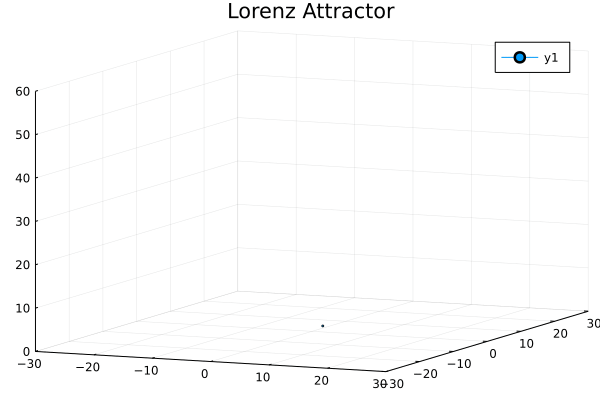

In [128]:
plotear(lorenzo)

### Links

https://youtu.be/wU6c8CDRXJE (Multiple Dispatch)

https://docs.julialang.org/en/v1/manual/metaprogramming/#Macros-and-dispatch

https://docs.julialang.org/en/v1/manual/metaprogramming/#man-macros

https://youtu.be/0oYYWNO3Us8 (Macros)

https://docs.juliaplots.org/latest/ (Plots)